degree distribution (random graph, BA graph, complete graph)

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 458
Average degree:   9.1600
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 291
Average degree:   5.8200
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 4950
Average degree:  99.0000
Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


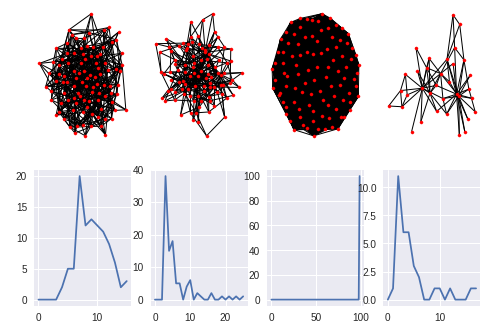

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

er = nx.erdos_renyi_graph(100, 0.1)
plt.subplot(241)
nx.draw(er, node_size=10, node_color='red')
print(nx.info(er))
plt.subplot(245)
plt.plot(nx.degree_histogram(er))

ba = nx.barabasi_albert_graph(100, 3)
plt.subplot(242)
nx.draw(ba, node_size=10, node_color='red')
print(nx.info(ba))
plt.subplot(246)
plt.plot(nx.degree_histogram(ba))

K_100 = nx.complete_graph(100)
plt.subplot(243)
nx.draw(K_100, node_size=10, node_color='red')
print(nx.info(K_100))
plt.subplot(247)
plt.plot(nx.degree_histogram(K_100))

karate = nx.karate_club_graph()
plt.subplot(244)
nx.draw(karate, node_size=10, node_color='red')
print(nx.info(karate))
plt.subplot(248)
plt.plot(nx.degree_histogram(karate))

random graph and the size of giant component

# of components (p=0.01):  47
size of the giant component (p=0.01): 22
# of components (p=0.015):  27
size of the giant component (p=0.015): 57
# of components (p=0.02):  16
size of the giant component (p=0.02): 84
# of components (p=0.025):  16
size of the giant component (p=0.025): 80


<Container object of 16 artists>

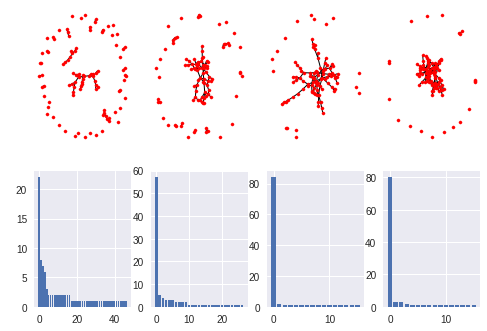

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

er01 = nx.erdos_renyi_graph(100, 0.01)
plt.subplot(241)
nx.draw(er01, node_size=10, node_color='red')
print("# of components (p=0.01): ", nx.number_connected_components(er01))
print("size of the giant component (p=0.01):", nx.number_of_nodes((max(nx.connected_component_subgraphs(er01), key=len))))
lst = []
for c in nx.connected_component_subgraphs(er01):
  lst.append(len(c))
lst.sort(reverse=True)
plt.subplot(245)
left = np.array(range(len(lst)))
height = np.array(lst)
plt.bar(left, height)

er015 = nx.erdos_renyi_graph(100, 0.015)
plt.subplot(242)
nx.draw(er015, node_size=10, node_color='red')
print("# of components (p=0.015): ", nx.number_connected_components(er015))
print("size of the giant component (p=0.015):", nx.number_of_nodes((max(nx.connected_component_subgraphs(er015), key=len))))
lst = []
for c in nx.connected_component_subgraphs(er015):
  lst.append(len(c))
lst.sort(reverse=True)
plt.subplot(246)
left = np.array(range(len(lst)))
height = np.array(lst)
plt.bar(left, height)

er02 = nx.erdos_renyi_graph(100, 0.02)
plt.subplot(243)
nx.draw(er02, node_size=10, node_color='red')
print("# of components (p=0.02): ", nx.number_connected_components(er02))
print("size of the giant component (p=0.02):", nx.number_of_nodes((max(nx.connected_component_subgraphs(er02), key=len))))
lst = []
for c in nx.connected_component_subgraphs(er02):
  lst.append(len(c))
lst.sort(reverse=True)
plt.subplot(247)
left = np.array(range(len(lst)))
height = np.array(lst)
plt.bar(left, height)

er025 = nx.erdos_renyi_graph(100, 0.025)
plt.subplot(244)
nx.draw(er025, node_size=10, node_color='red')
print("# of components (p=0.025): ", nx.number_connected_components(er025))
print("size of the giant component (p=0.025):", nx.number_of_nodes((max(nx.connected_component_subgraphs(er025), key=len))))
lst = []
for c in nx.connected_component_subgraphs(er025):
  lst.append(len(c))
lst.sort(reverse=True)
plt.subplot(248)
left = np.array(range(len(lst)))
height = np.array(lst)
plt.bar(left, height)

x axis : probability of random connection
y axis : size of the giant component

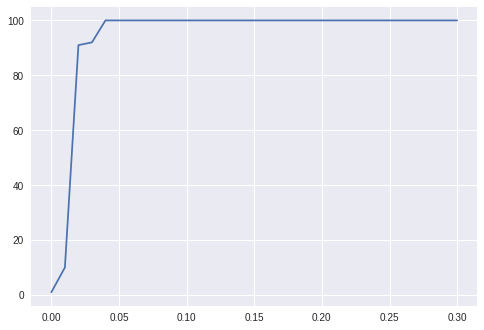

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

x = range(31)
y = [0] * 31
for i in x:
  erx = nx.erdos_renyi_graph(100, i*0.01)
  y[i] = nx.number_of_nodes((max(nx.connected_component_subgraphs(erx), key=len))) 
plt.plot(list(map(lambda x: x * 0.01, x)), y)

Giant Component

https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_giant_component.html#sphx-glr-auto-examples-drawing-plot-giant-component-py

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


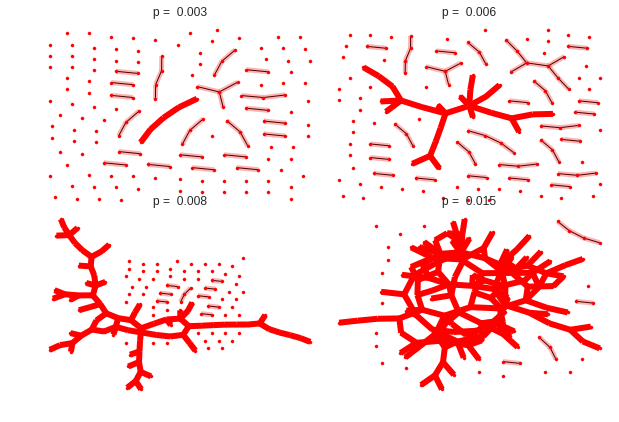

In [0]:
#    Copyright (C) 2006-2018
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import math

import matplotlib.pyplot as plt
import networkx as nx

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
    layout = graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
        layout = graphviz_layout
    except ImportError:
        print("PyGraphviz and pydot not found;\n"
              "drawing with spring layout;\n"
              "will be slow.")
        layout = nx.spring_layout


n = 150  # 150 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected
p_conn = math.log(n) / float(n)

# the following range of p values should be close to the threshold
pvals = [0.003, 0.006, 0.008, 0.015]

region = 220  # for pylab 2x2 subplot layout
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.01, hspace=0.01)
for p in pvals:
    G = nx.binomial_graph(n, p)
    pos = layout(G)
    region += 1
    plt.subplot(region)
    plt.title("p = %6.3f" % (p))
    nx.draw(G, pos,
            with_labels=False,
            node_size=10
           )
    # identify largest connected component
    Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
    G0 = Gcc[0]
    nx.draw_networkx_edges(G0, pos,
                           with_labels=False,
                           edge_color='r',
                           width=6.0
                          )
    # show other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(Gi, pos,
                                   with_labels=False,
                                   edge_color='r',
                                   alpha=0.3,
                                   width=5.0
                                  )
plt.show()

triangles and clustering coefficient of random graph
(only few number of triangles)

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
cc = 0
tr = 0
for i in range(10000):
  G = nx.erdos_renyi_graph(10, 0.15)
  cc = cc + nx.transitivity(G)
  tr = tr + sum(nx.triangles(G).values())/3
print("average of transitivity :", cc/10000)
print("average # of triangles :", tr/10000)

average of transitivity : 0.0946928335651221
average # of triangles : 0.3992


random graph -> ensemble of networks

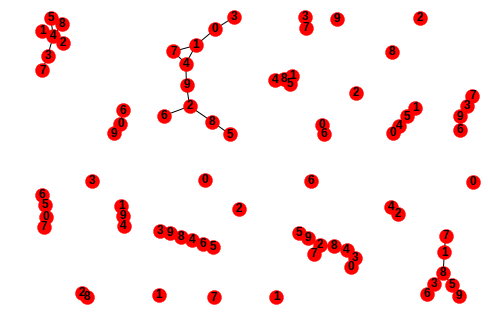

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(241)
G = nx.erdos_renyi_graph(10, 0.15)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(242)
G = nx.erdos_renyi_graph(10, 0.15)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(243)
G = nx.erdos_renyi_graph(10, 0.15)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(244)
G = nx.erdos_renyi_graph(10, 0.15)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(245)
G = nx.erdos_renyi_graph(10, 0.15)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(246)
G = nx.erdos_renyi_graph(10, 0.15)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(247)
G = nx.erdos_renyi_graph(10, 0.15)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(248)
G = nx.erdos_renyi_graph(10, 0.15)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')

degree sequence -> ensemble of networks

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


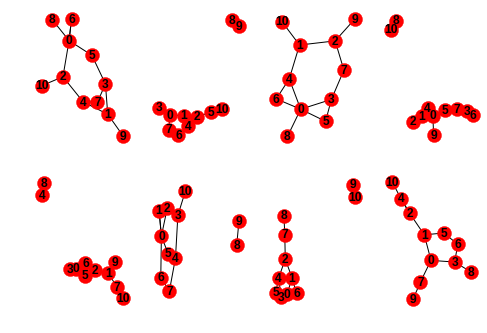

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

z = [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
plt.subplot(241)
G = nx.configuration_model(z)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(242)
G = nx.configuration_model(z)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(243)
G = nx.configuration_model(z)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(244)
G = nx.configuration_model(z)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(245)
G = nx.configuration_model(z)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(246)
G = nx.configuration_model(z)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(247)
G = nx.configuration_model(z)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')
plt.subplot(248)
G = nx.configuration_model(z)
nx.draw_spring(G, node_size=200, node_color="red", with_labels=True, font_weight='bold')

Numerical solution of S=1-e^(-cS)    (when c=-1.5)
-> [0.58281164]

In [0]:
from scipy import optimize, exp
def f(x):
  return x-1+exp(-1.5*x)
#print(optimize.fsolve(f,1)) #numpy.ndarray
print(optimize.newton(f,1)) #numpy.float64


0.5828116438658114


Numerical solution of S=1-e^(-cS)    (when c=-1.5)
-> [0.58281164]

In [0]:
from scipy import optimize, exp
def f(x):
  return x-1+exp(-1.5*x)
print(optimize.newton(f,1)) #optimize from 1 (0 is another solution)

0.5828116438658114


Numerical solution of S=1-e^(-cS)    (when c=-1.5)
-> [0.58281164]

In [0]:
from scipy import optimize, exp
print(optimize.newton(lambda x: x-1+exp(-1.5*x), 1)) #optimize from 1 (0 is another solution)

0.5828116438658114


drawing graph of polynomial ( y=x^3-7x^2+12x)

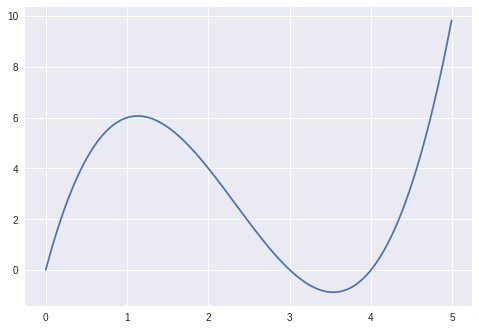

In [0]:
import matplotlib.pyplot as plt

x = range(500)
y = [0] * 500
for i in x:
  y[i] = (i/100)**3 - 7*(i/100)**2 + 12*(i/100) # y=x^3-7x^2+12x
plt.plot(list(map(lambda x: x * 0.01, x)), y)

graphical solution for the size of the giant component

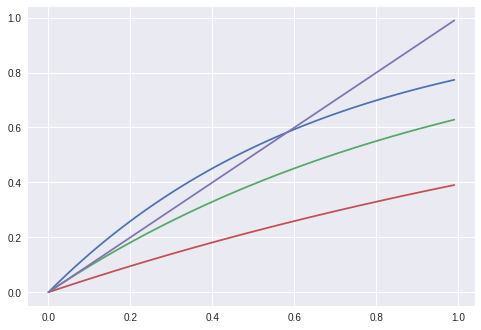

In [0]:
import matplotlib.pyplot as plt
from scipy import exp

x = range(100)
y = [0] * 100
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: 1-exp(-1.5*(x * 0.01)), x)))
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: 1-exp(-1*（(x * 0.01)), x)))
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: 1-exp(-0.5*(x * 0.01)), x)))
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x * 0.01, x)))
plt.show()

quiz11: draw a graph of S
S=1-e^{-cS}


Text(0, 0.5, 'Size of giant component S')

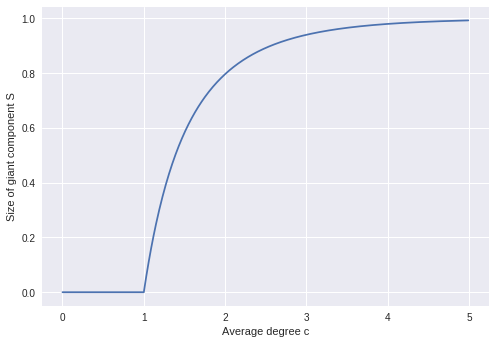

In [7]:
import matplotlib.pyplot as plt
from scipy import optimize, exp

x = range(500)
y = [0] * 500
for i in x:
  if i/100 <= 1:
    y[i] = 0
  else:
    y[i] = optimize.newton(lambda x: x-1+exp(-i/100*x), 1) #modify this part
plt.plot(list(map(lambda x: x * 0.01, x)), y)

plt.xlabel('Average degree c')
plt.ylabel('Size of giant component S')